Nom, prénom :

Nom, prénom :

# Descente du gradient avec pas cycliques

Dans ce devoir on va introduire une amelioration de la methode de la descente du gradient qui permet de trouver plus efficacement le minimiseur d'une fonction quadratique.

L'idée principale de cette méthode et de ne pas se limiter à des itérations de descente avec un pas constant, mais plutôt de considérer une liste de $K$ pas à utiliser de manière cyclique le long les itérations. Ce dégré de liberté en plus permet de construire une famille de méthodes qui ont la même complexité que l'algorithme à pas constant mais qui converge plus vite vers le minimiseur de la fonction quadratique considère. Pour mieux comprendre cette méthode, on va commencer par réintroudire la méthode de la descente du gradient classique.

**Nota bene :** certaines questions demandent des responses sous forme de dissertation (démonstration, calcul, discussion), vous pouvez soit donner la reponse dans la cellule de texte après la question, soit rajouter dans cette cellule une image de votre reponse manuscrite. N'oubliez pas d'envoyer tous vos fichiers.

In [1]:
# Importer les librairies 
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

## I. Rappel : la descente du gradient pour résoudre un système d'équations linéaires

Soit $A \in \mathcal{M}_n(\mathbb{R})$ une matrice réelle, symétrique et définie positive, et $b \in \mathbb{R}^n$ un vecteur. On note $0 < \mu  \leq L$ la plus petite et la plus grande valeur propre de $A$ ($\lambda_{min} = \mu$ et $\lambda_{max} = L$), de telle façon que le spectre de la matrice $A$ vérifie
$$
    \mathrm{Spec}(A) \subset [\mu, L].
$$
Résoudre le système 
$$
Ax = b
$$
est alors équivant à trouver le minimiseur de la fonction $f : \mathbb{R}^n \to \mathbb{R}$ définie par
$$
    f(x) = \frac12 \langle Ax, x \rangle - \langle b, x \rangle.
$$
Dans le cours, vous avez introduit l'algorithme de la descente du gradient qui permet de construire une suite de vecteurs $(x_k)_{k\in\mathbb{N}}$ approchant le minimiseur de $f$ : pour $h > 0$ donné, on considère les itérations
$$
\begin{cases}
x_0 \in \mathbb{R}^n \\
x_{k+1} = x_k - h \nabla f(x_k) = (I-hA)x_{k} + h b
\end{cases}\tag{GradDesc}
$$
On rappelle ici l'analyse de convergence de cette méthode dans cas quadratique - loi d'iterations linéaire (voir TD4 - Exercices 6 et 7 pour les détails). Soit le vecteur $x^* = A^{-1} b$, minimiseur de $f$, et posons la suite $(e_k)_k \subset \mathbb{R}^n$ des erreurs
$$
e_{k} = x_k - x^*.
$$
On a alors
$$
\begin{cases}
e_0 = x_0 - x^*  \\
e_{k+1} = (I-hA)e_{k} 
\end{cases} \implies e_{k} = (I-hA)^k e_0
$$
et
$$
\|e_k\| \leq \|I-hA\|^k \|e_0\|.
$$


**Question 0 :** Montrez que pour toute matrice symétrique $B \in \mathcal{M}_n(\mathbb{R})$, la norme subordonnée à la norme éuclidienne vérifie
$$
    \|B\| = \rho(B) = \max\{ |\lambda| : \lambda \in \mathrm{Spec}(B)\}
$$
et qu'alors, on a l'estimation suivante de l'erreur de convergence pour la méthode $\text{(GradDesc)}$
$$
    \|e_k\| \leq \rho(I-hA)^k \|e_0\|.
$$




On obtient alors la condition (nécessaire et) suffisante pour la convergence de l'algorithme
$$
    \text{$\forall x
_0 \in \mathbb{R}^n$, (GradDesc) converge} \iff \rho(I-hA) < 1 \iff 0 < h < \frac{2}{L}.
$$ 
De plus, le pas optimal garantissant la meilleure vitesse de convergence est obtenu en minimisant le rayon spectral de la matrice $I - hA$, c'est-à-dire en résolvant le problème suivant
$$
    h_{\mathrm{opt}} = \underset{h > 0}{\operatorname{argmin}} \rho(I-hA).
$$    
Or, pour toute matrice symétrique $A \in \mathcal{M}_n(\mathbb{R})$, le rayon spectral de la matrice $I-hA$ est obtenu par le
$$
    \rho(I-hA) = \operatorname{max} \{|1-h\lambda|, \lambda \in \mathrm{spe}(A)\}
$$
d'où
$$
    h_{\mathrm{opt}} = \underset{h > 0}{\operatorname{argmin}} \rho(I-hA) = \underset{h > 0}{\operatorname{argmin}} \operatorname{max}  \{|1-h\lambda|, \lambda \in \mathrm{spe}(A)\} =  \underset{h > 0}{\operatorname{argmin}}  \operatorname{max} \{|1-h\mu|, |1-hL|\} = \frac{2}{\mu + L}.
$$

**Question 1 :** Tracez sur un même graphique, les courbes $h \mapsto |1-h\mu|$, $h \mapsto |1-hL|$ et $h \mapsto |1-h\lambda|$, pour trois $\lambda \in ]\mu , L[$, avec $\mu = 1$ et $L = 2$. 

In [41]:
h = np.linspace(0, 2, 500)

f1 = np.abs(1 - h)
f2 = np.abs(1 - 2*h)
f3 = np.abs(1 - 1.5*h)
f4 = np.abs(1 - 1.25*h)
f5 = np.abs(1 - 1.75*h)

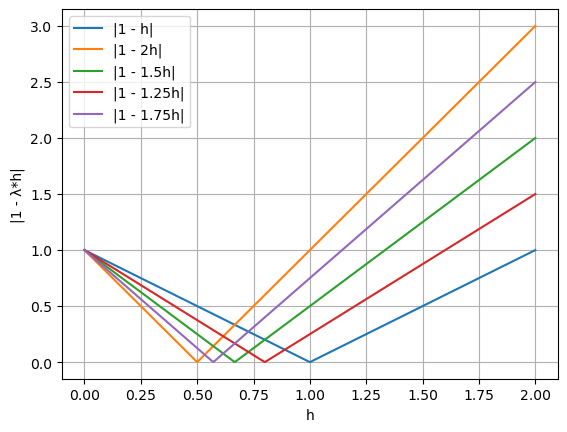

In [42]:
plt.plot(h, f1, label = "|1 - h|")
plt.plot(h, f2, label = "|1 - 2h|")
plt.plot(h, f3, label = "|1 - 1.5h|")
plt.plot(h, f4, label = "|1 - 1.25h|")
plt.plot(h, f5, label = "|1 - 1.75h|")

plt.xlabel("h")
plt.ylabel("|1 - λ*h|")
plt.legend()
plt.grid(True)
plt.show()

**Question 2 :** Écrivez la fonction `GradDesc(A,b, x0, h, k) ` qui applique l'algorithme du gradient à pas fixe à $f$, en partant de `x0` avec un pas de temps `h` qui
- s'arrête après $k$ itérations,
- renvoie la suite des itérés $(x_k)_k$ générée par l'algorithme $\text{(GradDesc)}$.

In [2]:
def gradf(A, b, x):
    return A @ x - b

In [133]:
def algo_grad(A,b,x0,h,k):
    x = x0
    suiteiteres = [x0]
    for _ in range(k):
        x = x - h * gradf(A, b, x)
        suiteiteres.append(x)
    return suiteiteres

**Question 3 :** Pour une matrice symétrique définie positive $A \in \mathcal{M}_{10} (\mathbb{R})$ et un vecteur $b \in \mathbb{R}^{10}$ générés aléatoirement, tracez la courbe d'erreur $(\| x_k - x^* \|)_k$ en fonction de $k \in [0,100]$.

*Astruce : pour générer une matrice symétrique définie positive, on pourra générer aléatoirement une matrice $B$ puis considèrer $A = B^TB$.*

In [162]:
N = 10
B = np.random.randn(N,N)
A = B.T @ B
b = np.random.randn(N)
x0 = np.random.randn(N)
lmax = la.norm(A,2)

xstar = la.inv(A) @ b

suiteGrad = algo_grad(A,b, x0, 2 / lmax, 100 )

def errorDiff(x):
        return la.norm(x-xstar)
fGrad = np.array([errorDiff(x) for x in suiteGrad])

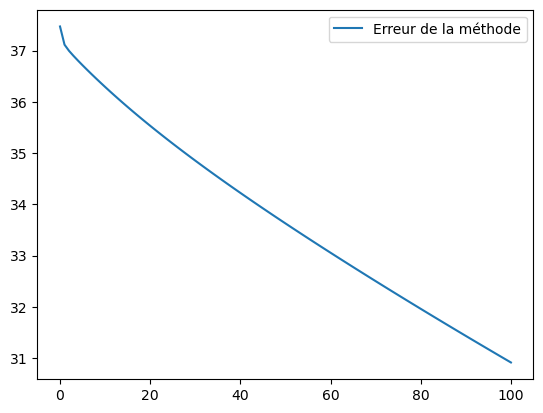

In [163]:
plt.plot(fGrad, label="Erreur de la méthode")
plt.legend()
plt.show()

### Une autre interprétation du pas optimal
On presente maintenant une autre interpretation du problème pour obtenir le pas optimal. Cette interprétation se prête mieux à l'introduire de la méthode à pas cyclique. On peut observer que :
- premierement, l'algorithme se base sur la connaissance de la localisation du spectre de la matrice $A$, et notamment on a supposé que
$$
    \mathrm{Spec}(A) \subset [\mu, L].
$$
- deuxièmement, pour choisir le pas optimal on a résolu le problème
$$
    h_{\mathrm{opt}} = \underset{h > 0}{\operatorname{argmin}} \underset{\lambda \in [\mu,L]}{\operatorname{max}} |1-h\lambda|.
$$

C'est-à-dire, parmi tous les polynômes de degré $1$ qui valent $1$ en $0$ (de la forme $1-h\lambda$), on cherche celui dont le maximum de la valeur abolue dans $[\mu,L]$ est la plus petite : $h$ est alors la reciproque de la racine de ce polynôme. On voit alors sur le graphe suivant que le polynôme $P_{opt} \, : \, \lambda \mapsto |1-h_{opt} \lambda|$, avec $h_{opt} = \frac{2}{L+\mu}$ satisfait bien cette propriété :

 ![](min_poly.png) 

## II. La descente du gradient 2-cyclique

On présente maintenant une première généralisation de la méthode de la descente du gradient. On considère l'algorithme usuel mais, plutôt que choisir un pas $h$ constant, on se donne la possibilité d'alterner entre deux pas differents. C'est-à-dire, pour $h_1, h_2 > 0$, on définit l'algorithme suivant
$$
\begin{cases}
x_0 \in \mathbb{R}^n \\
x_{k+1} = x_k - h_1 \nabla f(x_k) &\text{si $k$ paire} \\
x_{k+1} = x_k - h_2 \nabla f(x_k) &\text{si $k$ impaire}
\end{cases}\tag{GradDesc 2-cyc}
$$

**Question 4 :** Répétez l'analyse de convergence, rappelée dans la section I, pour montrer que
$$
    e_{2k} = \left[(I-h_2 A)(I-h_1A)\right]^k e_0
$$
et, en particulier, que
$$
    \text{(GradDesc 2-cyc) converge} \iff \rho((I-h_2A)(I-h_1A)) < 1.
$$ 

En copiant l'analyse précédente, on a
$$
\rho((I-h_2A)(I-h_1A)) \leq \underset{\lambda \in [\mu,L]}{\operatorname{max}} |(1-h_2\lambda)(1-h_1\lambda)|,
$$
et alors on cherche un couple $(h_{1,\mathrm{opt}}, h_{2,\mathrm{opt}})$ tel que 
$$
    (h_{1,\mathrm{opt}}, h_{2,\mathrm{opt}}) = \underset{h_1, h_2 > 0}{\operatorname{argmin}} \underset{\lambda \in [\mu,L]}{\operatorname{max}} |(1-h_2\lambda)(1-h_1\lambda)|.
$$

On peut alors montrer (voir aussi le graphique ci-dessous) que la fonction $(h_1 , h_2) \mapsto  \underset{\lambda \in [\mu,L]}{\operatorname{max}} |(1-h_2\lambda)(1-h_1\lambda)|$ est minimale pour 
$$
    h_{1,\mathrm{opt}} = \frac{2}{L+\mu} \frac{1}{1 + \frac{L-\mu}{L+\mu} \cos\left(\frac{\pi}{4}\right)}, \quad h_{2,\mathrm{opt}} = \frac{2}{L+\mu} \frac{1}{1 +\frac{L-\mu}{L+\mu} \cos\left(\frac{3\pi}{4}\right)}
$$
 ![](min_poly2.png) 

**Question 5 :** Pour une matrice symétrique définie positive $A \in \mathcal{M}_{10} (\mathbb{R})$ générée aléatoirement, comparez les fonctions $\lambda \in [\mu,L] \mapsto |I-h_{\mathrm{opt}}\lambda|^2$ et $\lambda \in [\mu,L]  \mapsto |(1-h_{1,\mathrm{opt}} \lambda)(1-h_{2,\mathrm{opt}} \lambda)|$, afin de vérifier graphiquement si on a l'amelioration souhaitée. 

In [185]:
µ = la.norm(A, -2)
L = la.norm(A, 2)
hopt = 2 / (µ + L)
h1opt = (2 / (L + µ) ) / (1 + ((L-µ) / (L + µ)) * np.cos(np.pi / 4))
h2opt = (2 / (L + µ) ) / (1 + ((L-µ) / (L + µ)) * np.cos(3 * np.pi / 4))

def f1(lam):
    return abs(1 - hopt * lam)**2
def f2(lam):
    return abs((1 - h1opt * lam)*(1 - h2opt * lam))

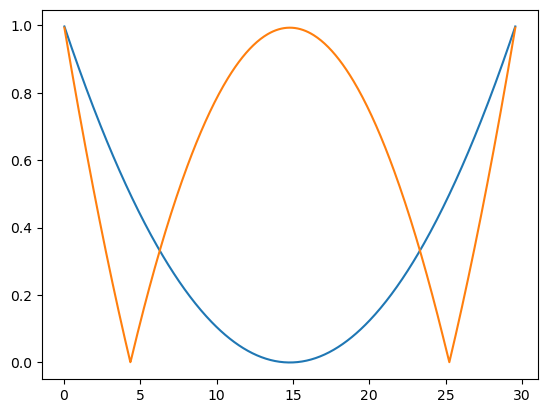

In [186]:
h = np.linspace(µ, L, 500)

h1 = f1(h)
h2 = f2(h)

plt.plot(h, h1)
plt.plot(h, h2)
plt.show()


On peut observer que le polynôme avec racines distinctes a effectivement une valeur absolue maximale inferieure, mais on constate aussi que le deuxième polynôme n'est pas toujours dominé par le premier. 

**Question 6 :** Écrivez la fonction `GradDesc2(A,b, x0, h, k) ` qui applique l'algorithme du gradient 2-cyclique à $f$, en partant de `x0` avec un vecteur de pas de temps `h`$\in\mathbb{R}^2$ qui
- s'arrête après $k$ itérations,
- renvoie la suite des itérés $(x_k)_k$ générée par l'aglorithme $\text{GradDesc 2-cyc}$.

In [152]:
def GradDesc2(A,b,x0,h,k):
    x = x0
    suiteiteres = [x0]
    for _ in range(k):
        if k % 2 == 0:
            x = x - h[0] * gradf(A, b, x)
        else:
            x = x - h[1] * gradf(A, b, x)
        suiteiteres.append(x)
    return suiteiteres

**Question 7 :**  Pour une matrice symétrique définie positive $A \in \mathcal{M}_{10} (\mathbb{R})$ et un vecteur $b \in \mathbb{R}^{10}$ générés aléatoirement, tracez la courbe d'erreur $(\| x_k - x^* \|)_k$ en fonction de $k \in [0,100]$, où $(x_k)_k$ a été générée avec l'algorithme $\text{(GradDesc 2-cyc)}$. Comparez-la avec la courbe d'erreur obtenue avec la méthode du gradient classique $\text{(GradDesc)}$. 

In [180]:
N = 10
B = np.random.randn(N,N)
A = B.T @ B
b = np.random.randn(N)
x0 = np.random.randn(N)
lmax = la.norm(A,2)

xstar = la.inv(A) @ b

µ = la.norm(A, -2)
L = la.norm(A, 2)
hopt = 2 / (µ + L)
h1opt = (2 / (L + µ) ) / (1 + ((L-µ) / (L + µ)) * np.cos(np.pi / 4))
h2opt = (2 / (L + µ) ) / (1 + ((L-µ) / (L + µ)) * np.cos(3 * np.pi / 4))


def errorDiff(x):
        return la.norm(x-xstar)
fGrad = np.array([errorDiff(x) for x in suiteGrad])
fGradCyc = np.array([errorDiff(x) for x in suiteGradCyc])
suiteGrad = algo_grad(A,b, x0, 2 / lmax, 100 )
suiteGradCyc = GradDesc2(A,b,x0,np.array([h1opt, h2opt]), 100)

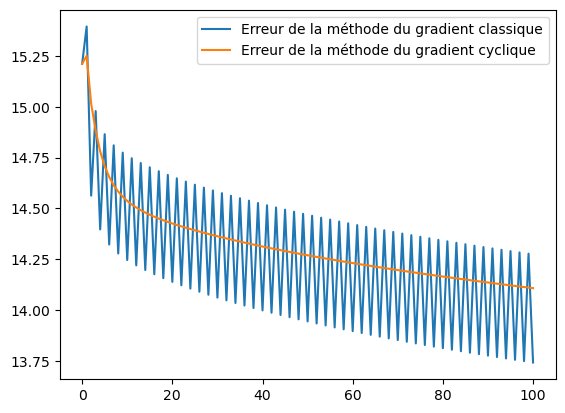

In [179]:
plt.plot(fGrad, label="Erreur de la méthode du gradient classique")
plt.plot(fGradCyc, label="Erreur de la méthode du gradient cyclique")
plt.legend()
plt.show()

**Question 8 :** On peut remarquer que la courbe de l'erreur pour la méthode 2-cyclique a une allure moins lisse, plus en forme de zigzag que la courbe pour la méthode de descente classique. Comment expliquez vous ce comportement ?

In [ ]:
#Oscillations entre le h1opt et le h2opt ce qui fait que la convergence est bizaroïde (demander à Lùkas il doit avoir une bonne idée)

## III. La descente du gradient K-cyclique

On peut généraliser l'analyse précédente au cas d'un cycle à $K$ pas. L'algorithme de descente s'écrit
$$
\begin{cases}
x_0 \in \mathbb{R}^n \\
x_{Kk+1} = x_{Kk} - h_1 \nabla f(x_{Kk}) \\
x_{Kk+2} = x_{Kk+1} - h_2 \nabla f(x_{Kk+1}) \\
\dots \\
x_{Kk+K} = x_{Kk+K-1} - h_K \nabla f(x_{Kk+K-1}) \\
\end{cases}\tag{GradDesc K-cyc}
$$
pour le choix de cycle de pas $(h_1, \dots, h_K)$. On obtient l'estimation de l'erreur de convergence à la fin d'un cycle 
$$
    e_{Kk} = \left[\prod_{i=1}^K(I-h_i A)\right]^k e_0
$$
et le choix optimal des pas est donné par le problème de minimisation suivant
$$
    h_{\mathrm{opt}} = \underset{h \in\mathbb{R}^K_+}{\operatorname{argmin}} \underset{\lambda \in [\mu,L]}{\operatorname{max}} \left|\prod_{i=1}^K(1-h_i \lambda)\right|.
$$
On peut réintepreter ce problème comme
$$
\min_{p \in \mathbb{P}_K(\mathbb{R})} \max_{\lambda \in [\mu,L]} |p(\lambda)|
$$
où $\mathbb{P}_K$ est l'ensemble des polynômes (scindés) de dégré $K$ et tels que $p(0) = 1$, et les pas $(h_1, \dots, h_K)$ seront, à nouveau, les réciproques des zéros du polynôme optimal.

Est-il possible de resoudre explicitement ce problème auxilliaire ? De façon un peu étonnante, oui ce problème a une solution explicite et simple à calculer : **les polynômes de Tchebychev** !

En étudiant les racines de ces polynômes particuliers, il est possible de montrer que le cycle optimal pour le $\text{(GradDesc K-cyc)}$ est donné par :
$$
    h_{i,\mathrm{opt}} = \frac{2}{L+\mu + (L-\mu) \cos\left(\frac{\pi (2i-1)}{2K}\right)}, \qquad i = 1, \dots, K.
$$



**Question 9 :** Pour $K = 3$ et $K = 4$, tracez le polynôme $\lambda \mapsto \left|\prod_{i=1}^K(1-h_i \lambda)\right|$ pour le cycle optimal et comparez le à $\lambda \mapsto \left|(1-h_{opt} \lambda)\right|^K$ où $h_{\mathrm{opt}}$ est le pas optimal de la méthode $\text{(GradDesc)}$.

In [209]:
K = 3

h3opts = []
for i in range(1,K+1):
    hiopt = 2 / (L + µ + (L - µ) * np.cos((np.pi * (2 * i - 1)) / (2 * K)))
    h3opts.append(hiopt)

def f3(lam):
    acc = 1
    for i in range(3):
        acc *= (1 - h3opts[i]*lam)
    return abs(acc)

K = 4
h4opts = []
for i in range(1,K+1):
    hiopt = 2 / (L + µ + (L - µ) * np.cos((np.pi * (2 * i - 1)) / (2 * K)))
    h4opts.append(hiopt)
    
def f4(lam):
    acc = 1
    for i in range(4):
        acc *= (1 - h4opts[i]*lam)
    return abs(acc)

def f1cube(lam):
    return abs(1 - hopt * lam) ** 3
def f1quatr(lam):
    return abs(1 - hopt*lam) ** 4

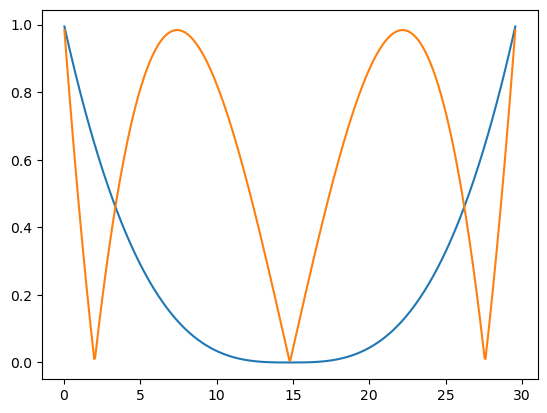

In [217]:
plt.plot(h, h1cube)
plt.plot(h, h3)
h1cube = f1cube(h)
h3 = f3(h)



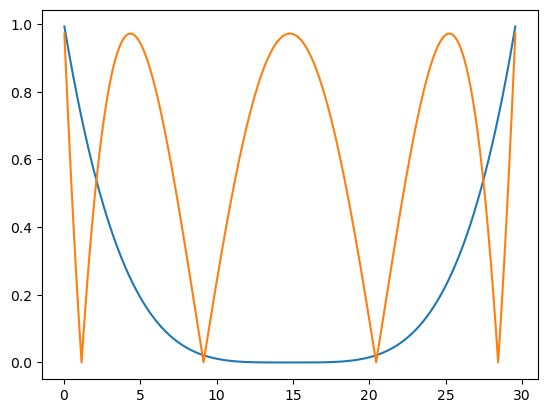

In [218]:
h = np.linspace(µ, L, 500)

h1quatr = f1quatr(h)
h4 = f4(h)

plt.plot(h, h1quatr)
plt.plot(h,h4)
plt.show()

**Question 10 :** Écrivez la fonction `GradDescK(A,b, x0, h, k,K) ` qui applique l'algorithme du gradient $K$-cyclique à $f$, en partant de `x0` avec un vecteur de pas de temps `h`$\in\mathbb{R}^K$ qui
- s'arrête après $k$ itérations,
- renvoie la suite des itérés $(x_k)_k$ générée par l'aglorithme $\text{GradDesc $K$-cyc}$.

**Question 11 :**  Pour une matrice symétrique définie positive $A \in \mathcal{M}_{10} (\mathbb{R})$ et un vecteur $b \in \mathbb{R}^{10}$ générés aléatoirement, tracez les courbes d'erreur $(\| x_k - x^* \|)_k$ en fonction de $k \in [0,100]$, où $(x_k)_k$ a été générée avec l'algorithme $\text{(GradDesc K-cyc)}$, pour différent $K$. Comparez les avec la courbe d'erreur obtenue avec la méthode du gradient classique $\text{(GradDesc)}$. 

**Question 12 :** Que remarquez vous lorsqu'on augmente la valeur de $K$ ?

## IV. Formulation par recurrence et cyclique infini


Les polynômes de Tchebychev, utilisés pour trouver le cycle optimal à $K$ fixé dans la section précédente, sont une base de polynômes qui interviennent dans plusieurs algorithmes de l'analyse numérique (interpolations, intégration numériques, algorithmes d'orthogonalisation, résolution d'équation aux dérivées partielles) grace à leur proprietés. Ils peuvent être définis par récurrence par la suite
$$
    \begin{cases}
    T_0(x) = 1\\
    T_1(x) = x\\
    T_{k+1}(x) = 2xT_k(x) - T_{k-1}(x).
    \end{cases}
$$

En utilisant cette suite, on peut définir l'algorithme de "cycle infini" suivant :


$$
    \begin{cases}
        x_0 \in \mathbb{R}^n \\
        x_1 = x_0 - \frac{2}{L+\mu}A x_0\\
        x_{k+1} = x_k + \frac{4}{L-\mu} \frac{\alpha_k}{\alpha_{k+1}}  (b-Ax_k) + \frac{\alpha_{k-1}}{\alpha_{k+1}}(x_k-x_{k-1}).
    \end{cases}\tag{GradDesc $\infty$-cyc}
$$

où la suite $(\alpha_k)_k$ est définie par récurrence par 
$$
    \begin{cases}
        \alpha_0 = 1 \\
        \alpha_1 = \frac{L+\mu}{L-\mu}\\
        \alpha_{k+1} = 2\frac{L+\mu}{L-\mu} \alpha_k - \alpha_{k-1}
    \end{cases}
$$





**Question 13 :** Écrivez la fonction `GradDescInf(A,b, x0, k) ` qui applique l'algorithme du gradient cycle infini à $f$, en partant de `x0` qui
- s'arrête après $k$ itérations,
- renvoie la suite des itérés $(x_k)_k$ générée par l'aglorithme $\text{GradDesc $\infty$-cyc}$.

**Question 14 :** Pour une matrice symétrique définie positive $A \in \mathcal{M}_{10} (\mathbb{R})$ et un vecteur $b \in \mathbb{R}^{10}$ générés aléatoirement, tracez la courbe d'erreur $(\| x_k - x^* \|)_k$ en fonction de $k \in [0,100]$, où $(x_k)_k$ a été générée avec l'algorithme $\text{(GradDesc $\infty$-cyc)}$. Comparez la avec les courbes d'erreur obtenues avec les méthodes $\text{(GradDesc)}$, $\text{(GradDesc K-cyc)}$, pour différents $K$. Que constatez vous ? 

## V. Visualisation en dimension 2

Dans cette dernière section, on va chercher à visualiser les itérés des diffèrentes méthodes implémentées précédement sur les lignes de niveau d'une fonction quadratique en dimension 2.

On définit la fonction $f \, : \, \mathbb{R}^2 \rightarrow \mathbb{R}$ par
$$
f(x) = \frac12 \langle Ax, x \rangle -\langle b, x \rangle ,
$$
avec 
$$
A = \begin{pmatrix}
9 & 7 \\
7 & 9 
\end{pmatrix} \quad \text{ et }  \quad
b = \begin{pmatrix}
1\\
-6
\end{pmatrix}.
$$

**Question 15 :** Sur le même graphe, tracez les itérations des suites générées par $\text{(GradDesc)}$, $\text{(GradDesc 2-cyc)}$, $\text{(GradDesc 5-cyc)}$ et $\text{(GradDesc $\infty$-cyc)}$ partant de $x_0 = (-5, -1)$ sur le graphe des lignes de niveaux de la fonction $f$.